## Analysis notebook for tests
This notebook treats:
1. Snapshot of the mesh with node point labels --> can I get hover over labels? Not hover over, but yes to labels
2. Slice(s) of the mesh
3. An animation of the deformation
4. Deformation per axis - volume averaged and per cell
5. Bulk volume change
6. Cell volume change of a specific cell number

### Notes
**13/02/2025**\
**WARNING** re-running cells can fuck up plots and graphs. When in doubt, restart the entire notebook to be safe.

In [3]:
# importing the relevant packages
import pyvista as pv
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# read in the data. Accepts .vtu/.vtk
folder = "field-test"
compr = "80" # deformation percentage (01 = 0.1%, 10 = 10%, etc.)
N_row = "25"
warpfactor = 1
solver = "jax_solver"
E_val = "1rho"
rho_center = 0.01
low_mesh_num = 2
hi_mesh_num = 18
scalar = 'density'

parent_dir1 = f'C:/Users/spaan/Thesis/data_run{folder}_{compr}_{solver}/vtk/'
parent_dir3 = f'C:/Users/spaan/Thesis/ThirdSesh_24-02-2025/data_run{folder}_{compr}_{solver}/vtk/'
parent_dir3center = f'C:/Users/spaan/Thesis/ThirdSesh_24-02-2025/Center fixed/data_run{folder}_{compr}_{solver}_{N_row}/vtk/'
parent_dir4 = f'C:/Users/spaan/Thesis/FourthSesh_03-03-2025/density-model-{folder}_{compr}_{solver}_{E_val}/vtk/'
parent_dir5 = f'C:/Users/spaan/Thesis/FifthSesh_06-03-2025/density-model-{folder}_{compr}_{solver}_{rho_center}_{E_val}/vtk/'
parent_dir_centerfield = f'C:/Users/spaan/Thesis/density-model-{folder}_{compr}_{solver}_{rho_center}_{E_val}/vtk/'

parent_dir = parent_dir_centerfield


meshes = []
warped_meshes = []
for subdir, dirs, files in os.walk(parent_dir):
    for file in files:
        fdir = parent_dir + file

        pv_mesh = pv.read(fdir)
        meshes.append(pv_mesh)
    n = len(files) # number of files = number of compression steps

print("Reading is done!")

# keep in mind that the factor of course works exponentially, so don't use the warp except for the final result, or scale by smt. else.
for mesh in meshes:
    warped_mesh = mesh.warp_by_vector('sol', factor = warpfactor)
    warped_meshes.append(warped_mesh)

Reading is done!


## Analysis
A series of analysis plots.

### Undeformed mesh geometry
Node labels, mesh geometry, anything you might want to know beforehand.

In [5]:
init_mesh = meshes[0]
init_mesh_warped = warped_meshes[0]
# creating a str list of point labels
n_points = init_mesh.n_points
n_cells = init_mesh.n_cells # automate this
n_mesh = n
p_labels = list(map(str, np.arange(0, n_points)))
print(n)


pl = pv.Plotter(shape=(1, 2))
pl.subplot(0,0)
pl.add_text("Cube at rest")
pl.add_mesh(init_mesh, show_edges=True, show_vertices=True, color = 'cyan')
pl.show_axes()
pl.add_floor(pad=1.0, color = 'silver')
pl.subplot(0,1)
pl.add_text("Node numbers")
pl.add_mesh(init_mesh, show_edges=True, show_vertices=True, opacity=0.2, color = 'cyan')
pl.show_axes()
pl.add_floor(pad=1.0, color = 'silver')
pl.add_point_labels(init_mesh.points, p_labels, font_size = 10, always_visible =False)

pl.show()

IndexError: list index out of range

## 1. Deformed mesh
We now turn to the deformed mesh. We have to warp the mesh by the solution field in order to display the deformation. Because the deformation is such a tiny factor, we magnify the deformation by 500. The applied colour map indicates the amount of deformation, where we can either use the default min-max values or specify a range with `clim`. 

In [2]:
pl2 = pv.Plotter(shape=(1, 2))

# low compression
pl2.subplot(0,0)
pl2.add_text(f"Mesh {low_mesh_num}")
pl2.add_mesh(warped_meshes[low_mesh_num], scalars = scalar, show_edges=True, cmap = 'magma', opacity = 'linear', scalar_bar_args={'title': 'u low'})
pl2.show_axes()
pl2.show_bounds()
pl2.add_floor(pad=1.0, color = 'silver')

# high compression
pl2.subplot(0,1)
pl2.add_text(f"Mesh {hi_mesh_num}")
pl2.add_mesh(warped_meshes[hi_mesh_num], scalars = scalar, show_edges=True, cmap = 'magma', opacity = 'linear', scalar_bar_args={'title': 'u high'})
pl2.show_axes()
pl2.show_bounds()
pl2.add_floor(pad=1.0, color = 'silver')


pl2.show()

NameError: name 'low_mesh_num' is not defined

### 2. Mesh slices
Various mesh slices. The `normal = [x,y,z]` param specifies how the normal vector to the slice is oriented.

See [this page](https://docs.pyvista.org/examples/01-filter/slicing.html) for more options.

c:\Users\spaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\spaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


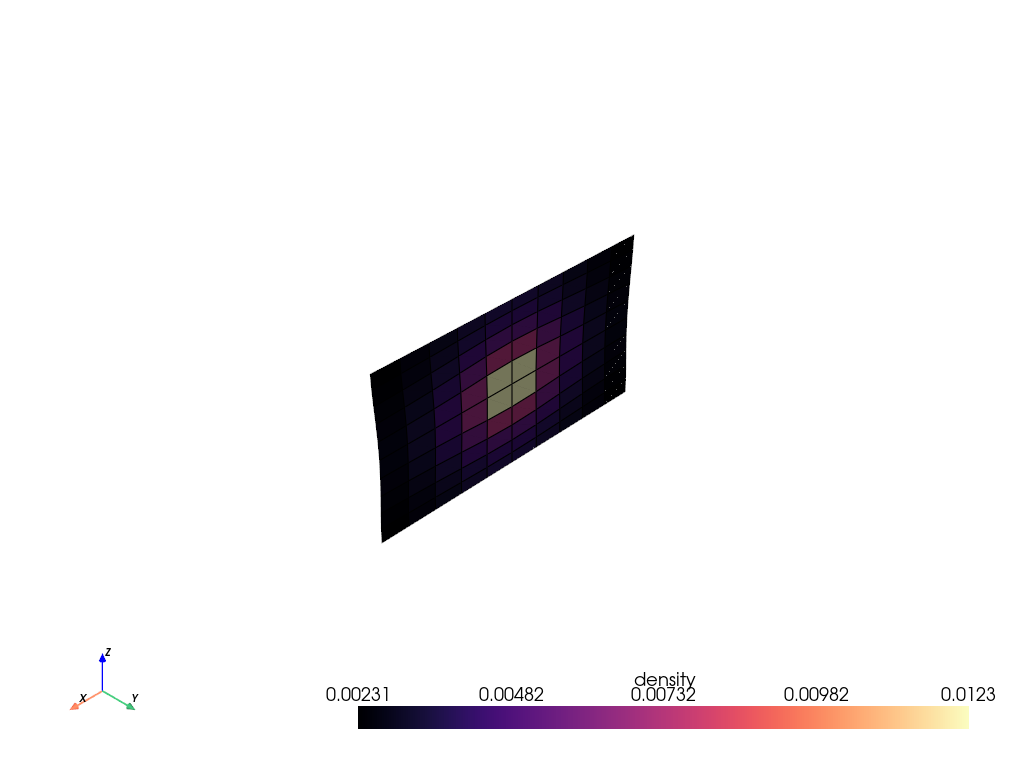

In [19]:
warped_mesh = warped_meshes[10]

slices = warped_mesh.slice(normal=[0,1,0])
pl = pv.Plotter()
pl.add_mesh(slices, scalars = scalar, show_edges = True, cmap = 'magma') # keep in mind that these values have been scaled by 500
pl.show_axes()
pl.add_floor(pad=1.0, color = 'silver')
pl.show()


We can also make it into a slider, but for it to be interactive it needs to be run in the python file. 

*Note:* in the python file the colormap maps onto the grid, here it doesn't and I don't understand why.

c:\Users\spaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\spaan\AppData\Local\Programs\Python\Python312\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


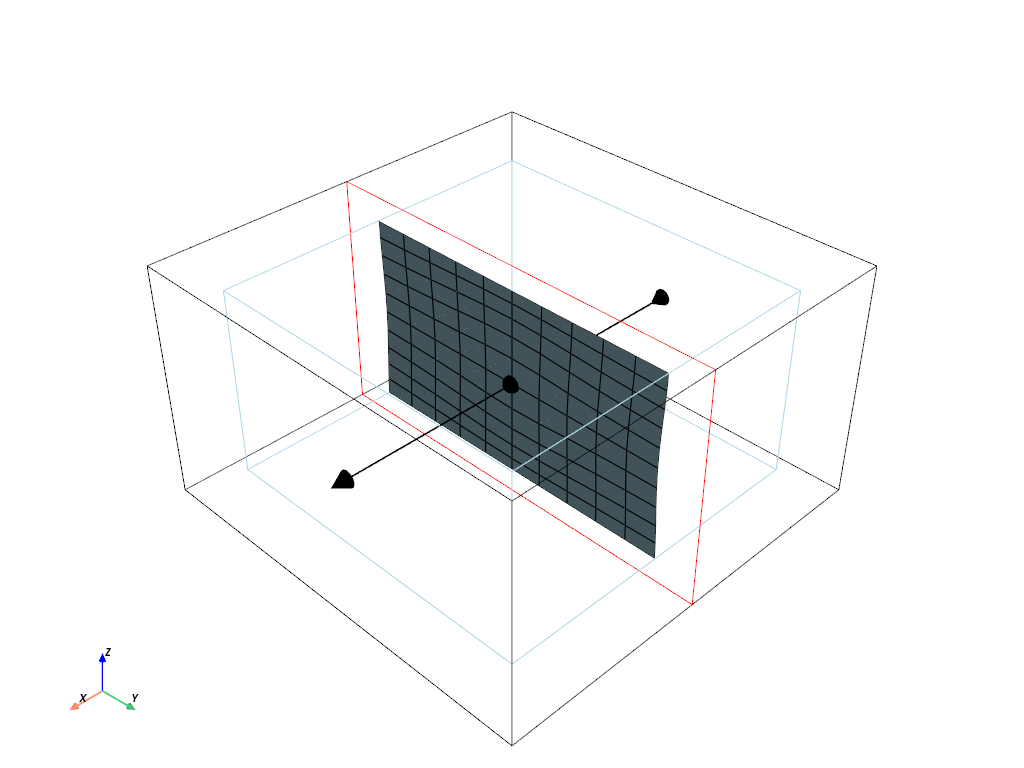

In [20]:
p_slider = pv.Plotter()
# mesh = meshes[15].warp_by_vector(vectors = 'sol')
_ = p_slider.add_mesh(warped_mesh.outline())
_ = p_slider.add_mesh_slice(warped_mesh, normal=[1, 0, 0], show_edges = True)
p_slider.show_axes()
# p_slider.show_bounds()
p_slider.show()

### 3. Animation
Let's create a short animation of the deformation and save it. Note that for some reason the deformation doesn't show in the color map, not sure yet why.
It also breaks if I change it to the full set of meshes rather than just 31/61. *Update*: that has more to do with Pyvista shenanigans than erronous coding, as reverting back to the previous code also breaks it. Well, moving on. \\

*Update update:* yup, Pyvista is just weird sometimes. Also, that clim arg. is not working or I don't understand what I'm doing. Probably the latter. Fix when better rested.

*24/02/2025:* gif generation is doing that weird jump of the mesh initially. When I run the notebook without generating a gif it works fine. 

In [ ]:
# # collect minimum and maximum uz values for setting the limits of the colormap
# min_uz, max_uz = np.zeros(n), np.zeros(n)
# for i, mesh in enumerate(warped_meshes):
#     min_u, max_u = mesh['sol'].min(axis=0), mesh['sol'].max(axis=0)
#     min_uz[i], max_uz[i] = min_u[2], max_u[2]

# print(n)
# #print(max_uz.max())

# # choose the mesh
# #first_mesh = meshes[0].warp_by_vector('sol', factor = warp)
# #first_mesh["uz"] = warped_init_mesh['sol'][:,2]
# first_mesh = warped_meshes[0]

# # create the gif
# gif_pl = pv.Plotter()
# gif_pl.add_mesh(first_mesh, show_edges=True, clim = [0,0.8], color = 'cyan')
# gif_pl.add_floor(pad=1.0, color='silver')
# gif_pl.show_axes()
# #gif_pl.show_bounds()

# gif_pl.open_gif(f"box-{folder}_{compr}.gif")
# print(f"box-{folder}_{compr}.gif")

# # I did it! Now why is the colormap not working
# for w_mesh in warped_meshes:
#     # update the initial mesh with new coordinates
#     first_mesh.points[:,:] = w_mesh.points[:,:]
#     first_mesh['sol'] = w_mesh['sol'][:,:]
#     #print(first_mesh['sol'][970])
#     #gif_pl.update_scalars()

#     gif_pl.write_frame()


# gif_pl.close()


20
box-field-test_80.gif


### 4. Volume changes
Here we can analyse the change in volume (and therefore in density). Let's look first at the change for the entire cube. This is easily computed with a few lines of code.\

**Update:** WHAT IF the bulk volume stays one in the unwarped mesh because it’s the default defined mesh and does not yet have the values applied? That would make the warped mesh (even by a factor of 1) the actual bulk volume of the cube after deformation. BUT THEN: why are the scalar values not applied from the get-go? That would be a conding issue on my side.\

Concretely: are the solutions correctly applied to the mesh *before* I warp it, or does it need to be warped in order to correctly display the deformation? Look at the gallery.

**17-02-2025 update:** Yup, that's it. Warp by vector before you see the changes, just don't warp it by a large amount or it might become unphysical.


In [21]:
# bulk_volumes = []
# for v_mesh in meshes:
#     #print(mesh)
#     sized = v_mesh.compute_cell_sizes()
#     cell_volumes = sized.cell_data["Volume"]
#     #print(cell_volumes[500])
#     bulk_volumes.append(np.sum(cell_volumes))

bulk_volumes_w = []
all_cell_vols = np.ndarray((n_mesh, n_cells))
for m, vw_mesh in enumerate(warped_meshes):
    #print(mesh)
    sized = vw_mesh.compute_cell_sizes()
    cell_volumes = sized.cell_data["Volume"]
    all_cell_vols[m,:] = cell_volumes[:]
    #print(cell_volumes[500])
    bulk_volumes_w.append(np.sum(cell_volumes))

# fig = plt.figure(figsize=(5,4))
# plt.plot(np.arange(n), bulk_volumes)
# plt.suptitle(f"Bulk volume sim {folder}_{compr} unwarped")
# #plt.ylim(999, 1001)
# plt.xlabel("Step")
# plt.ylabel("Bulk volume")
# # fig.savefig(f"C:/Users/spaan/Thesis/SecondSesh_13-02-2025/data_run{folder}_{compr}/imgs/bulkvolume_run{folder}_{compr}.png")
# # fig.savefig(f"C:/Users/spaan/Thesis/ThirdSesh_24-02-2025/data_run{folder}_{compr}_{solver}/bulkvolume_run{folder}_{compr}.png")
# fig.savefig(f"C:/Users/spaan/Thesis/ThirdSesh_24-02-2025/Center fixed/data_run{folder}_{compr}_{solver}_{N_row}/bulkvolume_run{folder}_{compr}.png")
# # fig.savefig(f"C:/Users/spaan/Thesis/data_run{folder}_{compr}_{solver}/imgs/bulkvolume_run{folder}_{compr}.png")
# plt.show()

# fig = plt.figure(figsize=(5,4))
# plt.plot(np.arange(n), bulk_volumes_w)
# plt.suptitle(f"Bulk volume sim {folder}_{compr} warped")
# #plt.ylim(999, 1001)
# plt.xlabel("Step")
# plt.ylabel("Bulk volume")
# fig.savefig(f"C:/Users/spaan/Thesis/SecondSesh_13-02-2025/Compression/data_run{folder}_{compr}/imgs/bulkvolume_warped{warpfactor}_run{folder}_{compr}.png")
# plt.show()



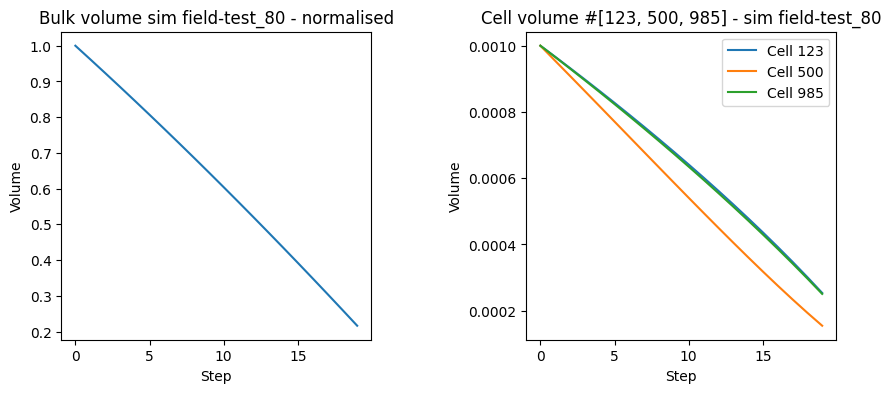

In [9]:
cells_smoll = [123, 500, 985]
cells_big = [123, 1500, 3300]
cells = cells_smoll

f_vol, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
plt.subplots_adjust(wspace = 0.5)

ax1.plot(np.arange(n), bulk_volumes_w/bulk_volumes_w[0])
ax1.set_title(f"Bulk volume sim {folder}_{compr} - normalised")
#ax1.set_ylim(0, 1.2)
ax1.set_xlabel("Step")
ax1.set_ylabel("Volume")

for cell in cells:
    ax2.plot(np.arange(n), all_cell_vols[:, cell], label = f"Cell {cell}")
ax2.set_title(f"Cell volume #{cells} - sim {folder}_{compr}")
#ax2.set_ylim(0, 0.0012)
ax2.set_xlabel("Step")
ax2.set_ylabel("Volume")

fig_dir = parent_dir[:-4]
f_vol.savefig(f"{fig_dir}/cubevolume_warpedby{warpfactor}_{compr}.png")

plt.legend()



*Update 13/02/2025:* I changed the warpfactor to 1, but the idiotic thing is that the weird shape stays. That shouldn't be happening, so somewhere my coding logic is not right. The weird jump at the start is sometimes there, sometimes not. I can exclude it I think.

*Update 17/02/2025:* all the cells have the same volume change, but at least I quantified it now. And it has exactly the same shape as the bulk volume curve. 

*Update 20/02/2025:* 80% does really weird things that could perhaps be fixed by proper boundary conditions. 20% looks neat. Although both still have that weird kink in the first elastic deformation, but that could again be BCs.

### 5. Deformation changes per cell, per axis
Need to check the locations of the nodes. Ideally you want something low and high up along the z-axis, but not at the surface.
Update: I gazed into the cube and identified 963, 970 as being in the exact middle of the xy plane, 963 towards the bottom and 970 towards the top.

Rotation check: comapring nodes 200, 443 which are resp. on the x and y axis, one node away from the z-axis at middle cube height. See how their deformation is.
Also included 83 which is exactly on the z-axis (xy = (0,0)), same xy-plane as 200 and 443; and 101, also on the same xy-plane but on the opposite z-side (so at xy = (1,1))


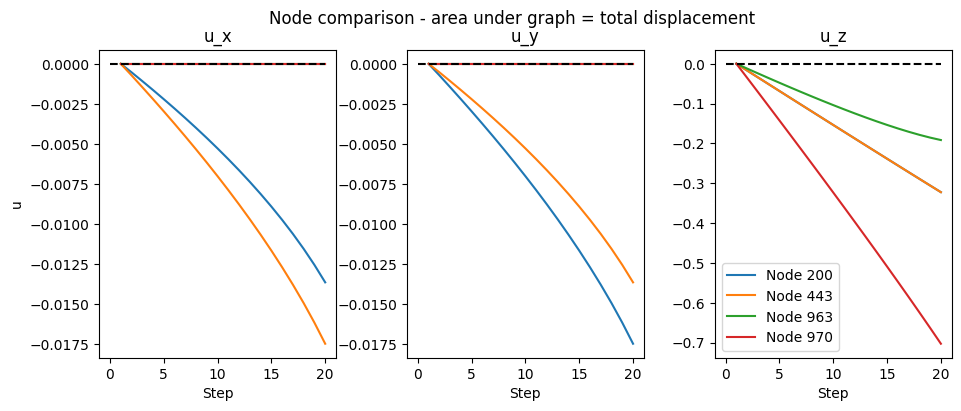

In [10]:
# saving deformations of nodes
nodes = [200, 443, 963, 970] # bottom, top node
node_nums = np.arange(1,n+1)
u_node = np.zeros((n, 3, len(nodes)))
i = 0
for i, mesh in enumerate(meshes):
    u = mesh['sol']
    u_node[i,:, 0] = u[nodes[0],:]
    u_node[i,:, 1] = u[nodes[1],:]
    u_node[i,:, 2] = u[nodes[2],:]
    u_node[i,:, 3] = u[nodes[3],:]


f, (axx, axy, axz) = plt.subplots(1, 3,  figsize=(11, 4))
f.suptitle(f"Node comparison - area under graph = total displacement")
plt.subplots_adjust(wspace=0.3)


axx.plot(node_nums, u_node[:,0, 0], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 1], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 2], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 3], '-', markersize=3)
axx.set_title('u_x')
axx.set_ylabel('u')
axx.set_xlabel('Step')
#axx.set_ylim(-0.0002, 0.0002)
axx.hlines(0,0, n, 'k', '--')

axy.plot(node_nums, u_node[:,1, 0], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 1], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 2], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 3], '-', markersize=3)
axy.set_title('u_y')
axy.set_xlabel('Step')
axy.hlines(0,0, n, 'k', '--')

axz.plot(node_nums, u_node[:,2, 0], '-', markersize=3, label = f"Node {nodes[0]}")
axz.plot(node_nums, u_node[:,2, 1], '-', markersize=3, label = f"Node {nodes[1]}")
axz.plot(node_nums, u_node[:,2, 2], '-', markersize=3, label = f"Node {nodes[2]}")
axz.plot(node_nums, u_node[:,2, 3], '-', markersize=3, label = f"Node {nodes[3]}")
axz.set_title('u_z')
axz.set_xlabel('Step')
axz.hlines(0,0, n, 'k', '--')

f.savefig(f"{fig_dir}/cell-movement_warpedby{warpfactor}_{compr}.png")

plt.legend()
plt.show()

### 6. Density changes per cell
We have densities now :D

In [ ]:
# saving deformations of nodes
nodes = [200, 443, 963, 970] # bottom, top node
node_nums = np.arange(1,n+1)
rho_node = np.zeros((n, len(nodes)))
i = 0
for i, mesh in enumerate(meshes):
    # find y-data
    rho = mesh['density']
    rho_node[i,:, 0] = rho[nodes[0],:]
    rho_node[i,:, 1] = rho[nodes[1],:]
    rho_node[i,:, 2] = rho[nodes[2],:]
    rho_node[i,:, 3] = rho[nodes[3],:]


f, (axx, axy, axz) = plt.subplots(1, 3,  figsize=(11, 4))
f.suptitle(f"Node comparison - area under graph = total displacement")
plt.subplots_adjust(wspace=0.3)


axx.plot(node_nums, u_node[:,0, 0], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 1], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 2], '-', markersize=3)
axx.plot(node_nums, u_node[:,0, 3], '-', markersize=3)
axx.set_title('u_x')
axx.set_ylabel('u')
axx.set_xlabel('Step')
#axx.set_ylim(-0.0002, 0.0002)
axx.hlines(0,0, n, 'k', '--')

axy.plot(node_nums, u_node[:,1, 0], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 1], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 2], '-', markersize=3)
axy.plot(node_nums, u_node[:,1, 3], '-', markersize=3)
axy.set_title('u_y')
axy.set_xlabel('Step')
axy.hlines(0,0, n, 'k', '--')

axz.plot(node_nums, u_node[:,2, 0], '-', markersize=3, label = f"Node {nodes[0]}")
axz.plot(node_nums, u_node[:,2, 1], '-', markersize=3, label = f"Node {nodes[1]}")
axz.plot(node_nums, u_node[:,2, 2], '-', markersize=3, label = f"Node {nodes[2]}")
axz.plot(node_nums, u_node[:,2, 3], '-', markersize=3, label = f"Node {nodes[3]}")
axz.set_title('u_z')
axz.set_xlabel('Step')
axz.hlines(0,0, n, 'k', '--')

f.savefig(f"{fig_dir}/cell-movement_warpedby{warpfactor}_{compr}.png")

plt.legend()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

200 vs 443, 83 vs 101:
- uz checks out, as they are at the same height in the cube and should therefore deform by the same amount in that direction.
- ux and uy also check out - they move first out during compression, then in during extension. That weird bump in the middle is interesting though, esp. since it has the same slope for nodes opposite in the mesh, where you would expect it to be mirrored. This indicates that this is a component unrelated to bulk extension/compression.

## Code try-outs
### Non-uniform density
`problem.fe.points[problem.fe.cells]` gives me the coordinates of each point, grouped by cell \
`problem.fe.points[center_cells]` gives me the coordinates of each point in the center, grouped by cell \
then I can set the density in those cells by
- defining an empty array shaped like ((shape)) with `self.density = np.full((shape), rho_low)`
- populating the center with `self.density[center_coords] = rho_high` or the jax equivalent

Question is: what do I feed it where and how.
- where do I find and supply the coordinates of the center (should be after defining the problem, to access the points)
- where do I set the density values (I'd say the init, but that is finicky)
- also, how do I check boolean stuff?

In [11]:
rho_arr = np.full((1000, 8), 0.0001)

